In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as f
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from sklearn import preprocessing
from tqdm import tqdm
from sklearn.preprocessing import FunctionTransformer
import seaborn as sns 
from scipy import stats
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
import h2o
from h2o.automl import H2OAutoML
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.neural_network import MLPRegressor
from scipy.stats import norm
import copy
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor, Pool, metrics, cv
import xgboost as xgb
from scipy.stats import gmean
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import optuna
from optuna import Trial, visualization
from hepml.core import plot_regression_tree


In [2]:
train_df =  pd.read_csv('sub_train.csv')
test_df  =  pd.read_csv('sub_test.csv')
for c in train_df.columns:
    if train_df[c].dtypes != 'float64':
        print(c)

startdate
climateregions__climateregion


In [3]:
exclude_cols = ['index', 'startdate']
target=["contest-tmp2m-14d__tmp2m"]
main_attrs = [c for c in train_df.columns if c not in exclude_cols and c not in target]
print("Main features:", len(main_attrs))

Main features: 59


In [4]:
X = train_df[main_attrs].values
y = train_df[target[0]].values
Xtest = test_df[main_attrs].values

X.shape, y.shape, Xtest.shape

((375734, 59), (375734,), (31354, 59))

In [7]:
tree_1 = DecisionTreeRegressor(max_depth=2)
tree_1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

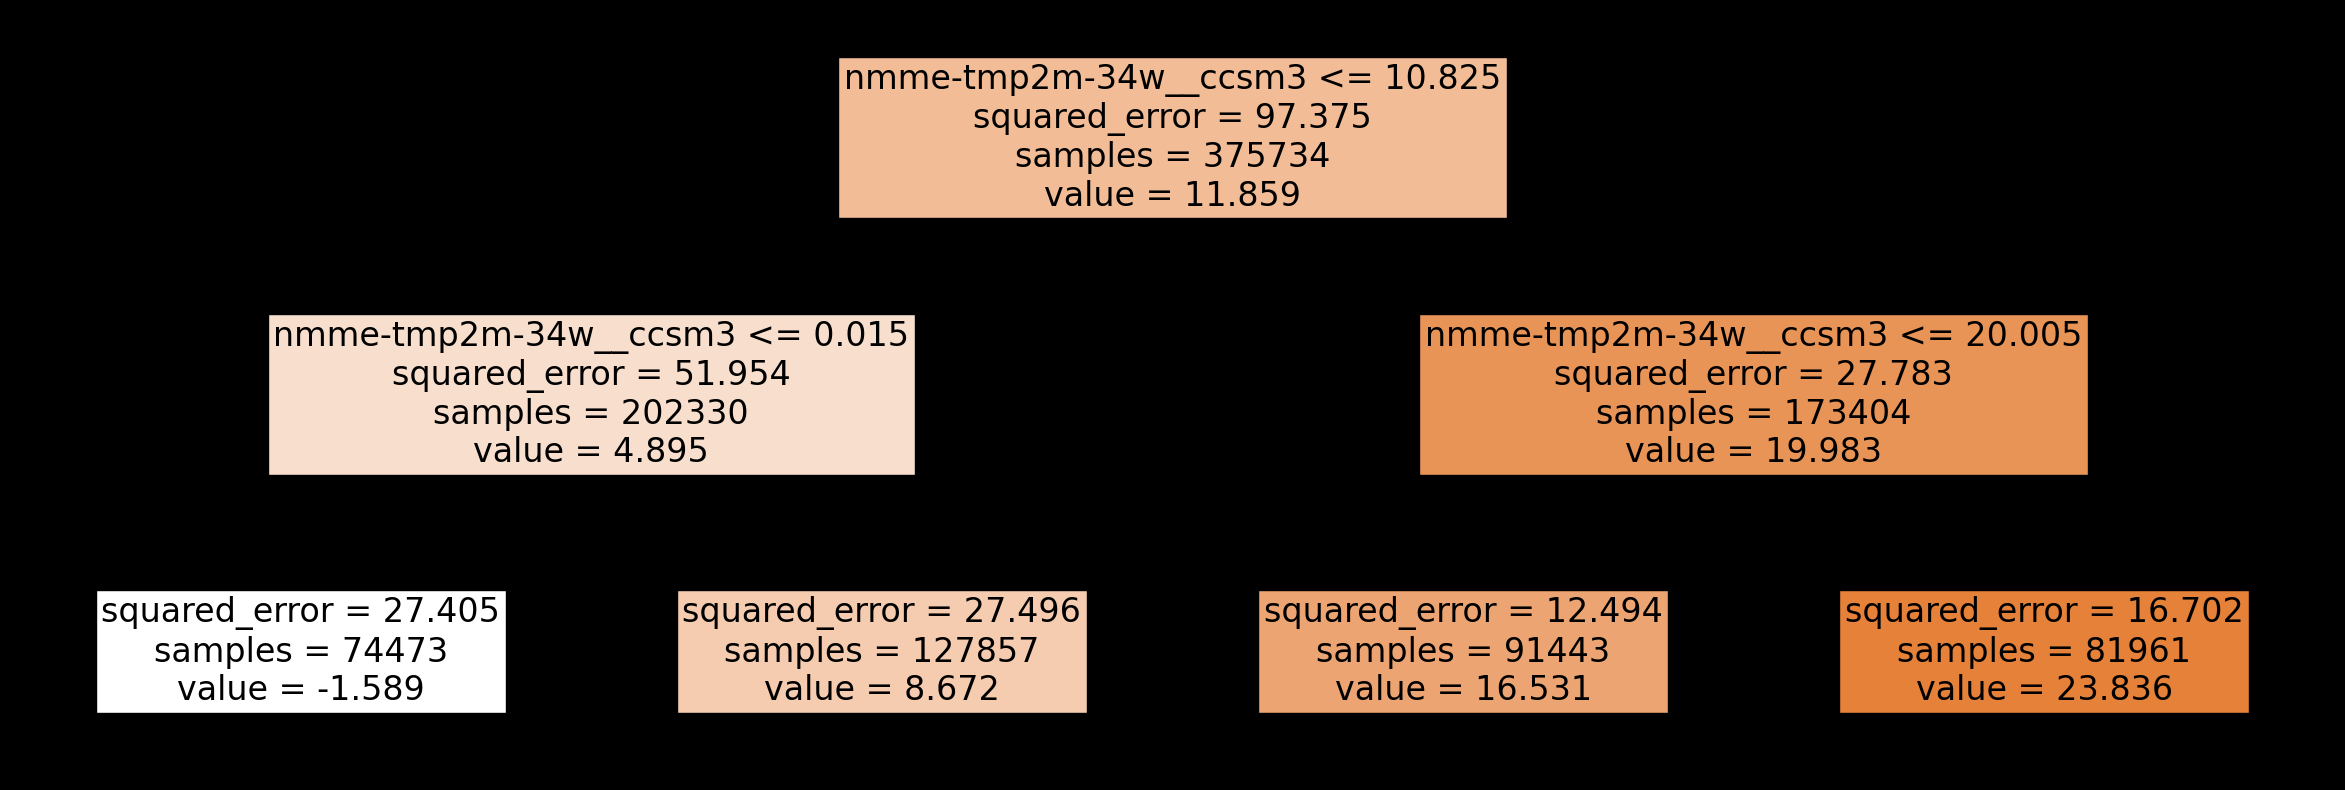

In [8]:
plot_regression_tree(tree_1,main_attrs + target, fontsize=24)

In [11]:
data = train_df[main_attrs + target]

In [12]:
data['Tree 1 prediction'] = tree_1.predict(X)
data[['Tree 1 prediction', target[0]]]

,Tree 1 prediction,contest-tmp2m-14d__tmp2m
0,23.835595,28.744480
1,23.835595,28.370585
2,23.835595,28.133059
3,23.835595,28.256798
4,23.835595,28.372353
...,...,...
375729,16.530810,17.150954
375730,16.530810,16.962051
375731,16.530810,16.915474
375732,16.530810,16.536761


In [37]:
data["Tree 1 residual"] = data[target[0]] - data["Tree 1 prediction"]
data.head()

,contest-wind-h500-14d__wind-hgt-500,contest-slp-14d__slp,nmme-tmp2m-34w__ccsm3,elevation__elevation,lon,contest-prwtr-eatm-14d__prwtr,lat,climateregions__climateregion,contest-pres-sfc-gauss-14d__pres,season_sin,day_of_year_sin,contest-precip-14d__precip,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-prate-34w__cfsv2,nmme-prate-34w__nasa,nmme-prate-56w__gfdlflora,wind-uwnd-250-2010-7,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-34w__nmmemean,nmme0-prate-34w__ccsm30,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,nmme0-prate-56w__cfsv20,nmme-prate-34w__cancm3,contest-rhum-sig995-14d__rhum,nmme-prate-34w__gfdlflorb,wind-hgt-850-2010-4,contest-wind-vwnd-250-14d__wind-vwnd-250,wind-hgt-100-2010-2,wind-uwnd-250-2010-18,wind-hgt-10-2010-5,wind-uwnd-250-2010-15,wind-uwnd-250-2010-4,nmme0-prate-56w__nasa0,nmme0-prate-34w__cfsv20,wind-vwnd-250-2010-10,contest-wind-h10-14d__wind-hgt-10,wind-uwnd-925-2010-15,wind-vwnd-250-2010-3,nmme-prate-34w__cancm4,sst-2010-4,nmme0-prate-56w__ccsm30,wind-uwnd-250-2010-16,nmme0-prate-34w__gfdl0,nmme0-prate-56w__cancm40,sst-2010-1,sst-2010-3,wind-uwnd-250-2010-14,nmme0-prate-34w__gfdlflora0,nmme-prate-34w__gfdl,wind-hgt-850-2010-9,wind-vwnd-250-2010-1,sst-2010-5,cancm30,nmme-prate-34w__ccsm4,nmme0-prate-34w__nasa0,wind-hgt-500-2010-9,nmme0-prate-34w__cancm30,wind-vwnd-250-2010-13,contest-tmp2m-14d__tmp2m,Tree 1 prediction,Tree 1 residual
0,5899.66,101352.08,27.54,200.0,0.833333,42.45,0.0,0,98644.97,-1.0,-0.871706,94.31,-2.56,38.05,16.5,35.99,-79.66,4.41,24.02,5.16,1535.52,-5.22,17.63,25.33,81.72,38.59,-1423.47,-3.52,-5160.59,35.85,7128.13,-109.81,80.55,14.88,23.16,-99.89,31246.63,-69.16,-129.06,17.55,13.58,14.36,125.75,8.41,5.89,352.20,-19.69,-28.03,3.28,18.06,-160.02,-111.29,19.29,30.18,25.28,14.53,1549.20,35.64,-208.23,28.744480,23.835595,4.908885
1,5901.03,101396.02,27.54,200.0,0.833333,42.66,0.0,0,98686.80,-1.0,-0.880012,100.85,-2.39,38.05,16.5,35.99,-68.43,3.74,24.02,5.16,1538.00,-5.20,17.63,25.33,82.56,38.59,-1419.57,-4.49,-5356.70,28.76,8109.37,-93.94,69.06,14.88,23.16,-113.06,31244.78,-63.53,-117.91,17.55,12.14,14.36,148.57,8.41,5.89,350.96,-20.66,-21.22,3.28,18.06,-71.80,-99.47,19.55,30.18,25.28,14.53,1667.04,35.64,-206.98,28.370585,23.835595,4.534990
2,5902.18,101429.25,27.54,200.0,0.833333,43.23,0.0,0,98712.85,-1.0,-0.888057,101.25,-2.76,38.05,16.5,35.99,-61.32,3.40,24.02,5.16,1540.32,-5.00,17.63,25.33,83.29,38.59,-1396.14,-5.44,-5546.88,24.45,9137.52,-82.93,57.24,14.88,23.16,-118.37,31239.27,-55.77,-102.43,17.55,10.97,14.36,168.50,8.41,5.89,349.86,-21.34,-12.64,3.28,18.06,39.03,-88.76,19.50,30.18,25.28,14.53,1743.11,35.64,-194.54,28.133059,23.835595,4.297465
3,5903.07,101440.85,27.54,200.0,0.833333,43.11,0.0,0,98711.70,-1.0,-0.895839,101.90,-3.00,38.05,16.5,35.99,-55.28,3.29,24.02,5.16,1541.10,-4.61,17.63,25.33,83.26,38.59,-1427.64,-5.76,-5692.21,20.95,10010.87,-72.03,41.14,14.88,23.16,-114.71,31232.86,-49.13,-88.59,17.55,9.78,14.36,183.67,8.41,5.89,348.91,-21.92,-3.04,3.28,18.06,206.58,-77.04,19.24,30.18,25.28,14.53,1746.57,35.64,-173.41,28.256798,23.835595,4.421203
4,5903.36,101419.53,27.54,200.0,0.833333,42.98,0.0,0,98686.46,-1.0,-0.903356,82.95,-3.40,38.05,16.5,35.99,-52.36,3.27,24.02,5.16,1539.73,-4.25,17.63,25.33,82.50,38.59,-1519.72,-6.09,-5754.12,11.62,10458.26,-61.63,17.51,14.88,23.16,-104.17,31226.16,-44.64,-78.36,17.55,8.51,14.36,189.46,8.41,5.89,348.03,-22.54,4.09,3.28,18.06,427.52,-65.40,18.92,30.18,25.28,14.53,1698.71,35.64,-151.92,28.372353,23.835595,4.536758


In [38]:
tree_2 = DecisionTreeRegressor(max_depth=2)
tree_2.fit(X, data["Tree 1 residual"])

DecisionTreeRegressor(max_depth=2)

In [39]:
data["Tree 2 prediction"] = tree_2.predict(X)
data["Tree 1 + tree 2 prediction"] = sum(tree.predict(X) for tree in (tree_1, tree_2))
data.head()

,contest-wind-h500-14d__wind-hgt-500,contest-slp-14d__slp,nmme-tmp2m-34w__ccsm3,elevation__elevation,lon,contest-prwtr-eatm-14d__prwtr,lat,climateregions__climateregion,contest-pres-sfc-gauss-14d__pres,season_sin,day_of_year_sin,contest-precip-14d__precip,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-prate-34w__cfsv2,nmme-prate-34w__nasa,nmme-prate-56w__gfdlflora,wind-uwnd-250-2010-7,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-34w__nmmemean,nmme0-prate-34w__ccsm30,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,nmme0-prate-56w__cfsv20,nmme-prate-34w__cancm3,contest-rhum-sig995-14d__rhum,nmme-prate-34w__gfdlflorb,wind-hgt-850-2010-4,contest-wind-vwnd-250-14d__wind-vwnd-250,wind-hgt-100-2010-2,wind-uwnd-250-2010-18,wind-hgt-10-2010-5,wind-uwnd-250-2010-15,wind-uwnd-250-2010-4,nmme0-prate-56w__nasa0,nmme0-prate-34w__cfsv20,wind-vwnd-250-2010-10,contest-wind-h10-14d__wind-hgt-10,wind-uwnd-925-2010-15,wind-vwnd-250-2010-3,nmme-prate-34w__cancm4,sst-2010-4,nmme0-prate-56w__ccsm30,wind-uwnd-250-2010-16,nmme0-prate-34w__gfdl0,nmme0-prate-56w__cancm40,sst-2010-1,sst-2010-3,wind-uwnd-250-2010-14,nmme0-prate-34w__gfdlflora0,nmme-prate-34w__gfdl,wind-hgt-850-2010-9,wind-vwnd-250-2010-1,sst-2010-5,cancm30,nmme-prate-34w__ccsm4,nmme0-prate-34w__nasa0,wind-hgt-500-2010-9,nmme0-prate-34w__cancm30,wind-vwnd-250-2010-13,contest-tmp2m-14d__tmp2m,Tree 1 prediction,Tree 1 residual,Tree 2 prediction,Tree 1 + tree 2 prediction
0,5899.66,101352.08,27.54,200.0,0.833333,42.45,0.0,0,98644.97,-1.0,-0.871706,94.31,-2.56,38.05,16.5,35.99,-79.66,4.41,24.02,5.16,1535.52,-5.22,17.63,25.33,81.72,38.59,-1423.47,-3.52,-5160.59,35.85,7128.13,-109.81,80.55,14.88,23.16,-99.89,31246.63,-69.16,-129.06,17.55,13.58,14.36,125.75,8.41,5.89,352.20,-19.69,-28.03,3.28,18.06,-160.02,-111.29,19.29,30.18,25.28,14.53,1549.20,35.64,-208.23,28.744480,23.835595,4.908885,0.321268,24.156862
1,5901.03,101396.02,27.54,200.0,0.833333,42.66,0.0,0,98686.80,-1.0,-0.880012,100.85,-2.39,38.05,16.5,35.99,-68.43,3.74,24.02,5.16,1538.00,-5.20,17.63,25.33,82.56,38.59,-1419.57,-4.49,-5356.70,28.76,8109.37,-93.94,69.06,14.88,23.16,-113.06,31244.78,-63.53,-117.91,17.55,12.14,14.36,148.57,8.41,5.89,350.96,-20.66,-21.22,3.28,18.06,-71.80,-99.47,19.55,30.18,25.28,14.53,1667.04,35.64,-206.98,28.370585,23.835595,4.534990,0.321268,24.156862
2,5902.18,101429.25,27.54,200.0,0.833333,43.23,0.0,0,98712.85,-1.0,-0.888057,101.25,-2.76,38.05,16.5,35.99,-61.32,3.40,24.02,5.16,1540.32,-5.00,17.63,25.33,83.29,38.59,-1396.14,-5.44,-5546.88,24.45,9137.52,-82.93,57.24,14.88,23.16,-118.37,31239.27,-55.77,-102.43,17.55,10.97,14.36,168.50,8.41,5.89,349.86,-21.34,-12.64,3.28,18.06,39.03,-88.76,19.50,30.18,25.28,14.53,1743.11,35.64,-194.54,28.133059,23.835595,4.297465,0.321268,24.156862
3,5903.07,101440.85,27.54,200.0,0.833333,43.11,0.0,0,98711.70,-1.0,-0.895839,101.90,-3.00,38.05,16.5,35.99,-55.28,3.29,24.02,5.16,1541.10,-4.61,17.63,25.33,83.26,38.59,-1427.64,-5.76,-5692.21,20.95,10010.87,-72.03,41.14,14.88,23.16,-114.71,31232.86,-49.13,-88.59,17.55,9.78,14.36,183.67,8.41,5.89,348.91,-21.92,-3.04,3.28,18.06,206.58,-77.04,19.24,30.18,25.28,14.53,1746.57,35.64,-173.41,28.256798,23.835595,4.421203,0.321268,24.156862
4,5903.36,101419.53,27.54,200.0,0.833333,42.98,0.0,0,98686.46,-1.0,-0.903356,82.95,-3.40,38.05,16.5,35.99,-52.36,3.27,24.02,5.16,1539.73,-4.25,17.63,25.33,82.50,38.59,-1519.72,-6.09,-5754.12,11.62,10458.26,-61.63,17.51,14.88,23.16,-104.17,31226.16,-44.64,-78.36,17.55,8.51,14.36,189.46,8.41,5.89,348.03,-22.54,4.09,3.28,18.06,427.52,-65.40,18.92,30.18,25.28,14.53,1698.71,35.64,-151.92,28.372353,23.835595,4.536758,0.321268,24.156862


In [40]:
data["Tree 1 + tree 2 residual"] = data["Tree 1 residual"] - data["Tree 2 prediction"]
data.head()

,contest-wind-h500-14d__wind-hgt-500,contest-slp-14d__slp,nmme-tmp2m-34w__ccsm3,elevation__elevation,lon,contest-prwtr-eatm-14d__prwtr,lat,climateregions__climateregion,contest-pres-sfc-gauss-14d__pres,season_sin,day_of_year_sin,contest-precip-14d__precip,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-prate-34w__cfsv2,nmme-prate-34w__nasa,nmme-prate-56w__gfdlflora,wind-uwnd-250-2010-7,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-34w__nmmemean,nmme0-prate-34w__ccsm30,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,nmme0-prate-56w__cfsv20,nmme-prate-34w__cancm3,contest-rhum-sig995-14d__rhum,nmme-prate-34w__gfdlflorb,wind-hgt-850-2010-4,contest-wind-vwnd-250-14d__wind-vwnd-250,wind-hgt-100-2010-2,wind-uwnd-250-2010-18,wind-hgt-10-2010-5,wind-uwnd-250-2010-15,wind-uwnd-250-2010-4,nmme0-prate-56w__nasa0,nmme0-prate-34w__cfsv20,wind-vwnd-250-2010-10,contest-wind-h10-14d__wind-hgt-10,wind-uwnd-925-2010-15,wind-vwnd-250-2010-3,nmme-prate-34w__cancm4,sst-2010-4,nmme0-prate-56w__ccsm30,wind-uwnd-250-2010-16,nmme0-prate-34w__gfdl0,nmme0-prate-56w__cancm40,sst-2010-1,sst-2010-3,wind-uwnd-250-2010-14,nmme0-prate-34w__gfdlflora0,nmme-prate-34w__gfdl,wind-hgt-850-2010-9,wind-vwnd-250-2010-1,sst-2010-5,cancm30,nmme-prate-34w__ccsm4,nmme0-prate-34w__nasa0,wind-hgt-500-2010-9,nmme0-prate-34w__cancm30,wind-vwnd-250-2010-13,contest-tmp2m-14d__tmp2m,Tree 1 prediction,Tree 1 residual,Tree 2 prediction,Tree 1 + tree 2 prediction,Tree 1 + tree 2 residual
0,5899.66,101352.08,27.54,200.0,0.833333,42.45,0.0,0,98644.97,-1.0,-0.871706,94.31,-2.56,38.05,16.5,35.99,-79.66,4.41,24.02,5.16,1535.52,-5.22,17.63,25.33,81.72,38.59,-1423.47,-3.52,-5160.59,35.85,7128.13,-109.81,80.55,14.88,23.16,-99.89,31246.63,-69.16,-129.06,17.55,13.58,14.36,125.75,8.41,5.89,352.20,-19.69,-28.03,3.28,18.06,-160.02,-111.29,19.29,30.18,25.28,14.53,1549.20,35.64,-208.23,28.744480,23.835595,4.908885,0.321268,24.156862,4.587618
1,5901.03,101396.02,27.54,200.0,0.833333,42.66,0.0,0,98686.80,-1.0,-0.880012,100.85,-2.39,38.05,16.5,35.99,-68.43,3.74,24.02,5.16,1538.00,-5.20,17.63,25.33,82.56,38.59,-1419.57,-4.49,-5356.70,28.76,8109.37,-93.94,69.06,14.88,23.16,-113.06,31244.78,-63.53,-117.91,17.55,12.14,14.36,148.57,8.41,5.89,350.96,-20.66,-21.22,3.28,18.06,-71.80,-99.47,19.55,30.18,25.28,14.53,1667.04,35.64,-206.98,28.370585,23.835595,4.534990,0.321268,24.156862,4.213722
2,5902.18,101429.25,27.54,200.0,0.833333,43.23,0.0,0,98712.85,-1.0,-0.888057,101.25,-2.76,38.05,16.5,35.99,-61.32,3.40,24.02,5.16,1540.32,-5.00,17.63,25.33,83.29,38.59,-1396.14,-5.44,-5546.88,24.45,9137.52,-82.93,57.24,14.88,23.16,-118.37,31239.27,-55.77,-102.43,17.55,10.97,14.36,168.50,8.41,5.89,349.86,-21.34,-12.64,3.28,18.06,39.03,-88.76,19.50,30.18,25.28,14.53,1743.11,35.64,-194.54,28.133059,23.835595,4.297465,0.321268,24.156862,3.976197
3,5903.07,101440.85,27.54,200.0,0.833333,43.11,0.0,0,98711.70,-1.0,-0.895839,101.90,-3.00,38.05,16.5,35.99,-55.28,3.29,24.02,5.16,1541.10,-4.61,17.63,25.33,83.26,38.59,-1427.64,-5.76,-5692.21,20.95,10010.87,-72.03,41.14,14.88,23.16,-114.71,31232.86,-49.13,-88.59,17.55,9.78,14.36,183.67,8.41,5.89,348.91,-21.92,-3.04,3.28,18.06,206.58,-77.04,19.24,30.18,25.28,14.53,1746.57,35.64,-173.41,28.256798,23.835595,4.421203,0.321268,24.156862,4.099936
4,5903.36,101419.53,27.54,200.0,0.833333,42.98,0.0,0,98686.46,-1.0,-0.903356,82.95,-3.40,38.05,16.5,35.99,-52.36,3.27,24.02,5.16,1539.73,-4.25,17.63,25.33,82.50,38.59,-1519.72,-6.09,-5754.12,11.62,10458.26,-61.63,17.51,14.88,23.16,-104.17,31226.16,-44.64,-78.36,17.55,8.51,14.36,189.46,8.41,5.89,348.03,-22.54,4.09,3.28,18.06,427.52,-65.40,18.92,30.18,25.28,14.53,1698.71,35.64,-151.92,28.372353,23.835595,4.536758,0.321268,24.156862,4.215491


In [41]:
tree_3 = DecisionTreeRegressor(max_depth=2)
tree_3.fit(X, data["Tree 1 + tree 2 residual"])

DecisionTreeRegressor(max_depth=2)

In [42]:
data["Tree 3 prediction"] = tree_3.predict(X)
data["Tree 1 + tree 2 + tree 3 prediction"] = sum(tree.predict(X) for tree in (tree_1, tree_2, tree_3))
data["Final residual"] = data["Tree 1 + tree 2 residual"] - data["Tree 3 prediction"]
data.head()

,contest-wind-h500-14d__wind-hgt-500,contest-slp-14d__slp,nmme-tmp2m-34w__ccsm3,elevation__elevation,lon,contest-prwtr-eatm-14d__prwtr,lat,climateregions__climateregion,contest-pres-sfc-gauss-14d__pres,season_sin,day_of_year_sin,contest-precip-14d__precip,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-prate-34w__cfsv2,nmme-prate-34w__nasa,nmme-prate-56w__gfdlflora,wind-uwnd-250-2010-7,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-34w__nmmemean,nmme0-prate-34w__ccsm30,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,nmme0-prate-56w__cfsv20,nmme-prate-34w__cancm3,contest-rhum-sig995-14d__rhum,nmme-prate-34w__gfdlflorb,wind-hgt-850-2010-4,contest-wind-vwnd-250-14d__wind-vwnd-250,wind-hgt-100-2010-2,wind-uwnd-250-2010-18,wind-hgt-10-2010-5,wind-uwnd-250-2010-15,wind-uwnd-250-2010-4,nmme0-prate-56w__nasa0,nmme0-prate-34w__cfsv20,wind-vwnd-250-2010-10,contest-wind-h10-14d__wind-hgt-10,wind-uwnd-925-2010-15,wind-vwnd-250-2010-3,nmme-prate-34w__cancm4,sst-2010-4,nmme0-prate-56w__ccsm30,wind-uwnd-250-2010-16,nmme0-prate-34w__gfdl0,nmme0-prate-56w__cancm40,sst-2010-1,sst-2010-3,wind-uwnd-250-2010-14,nmme0-prate-34w__gfdlflora0,nmme-prate-34w__gfdl,wind-hgt-850-2010-9,wind-vwnd-250-2010-1,sst-2010-5,cancm30,nmme-prate-34w__ccsm4,nmme0-prate-34w__nasa0,wind-hgt-500-2010-9,nmme0-prate-34w__cancm30,wind-vwnd-250-2010-13,contest-tmp2m-14d__tmp2m,Tree 1 prediction,Tree 1 residual,Tree 2 prediction,Tree 1 + tree 2 prediction,Tree 1 + tree 2 residual,Tree 3 prediction,Tree 1 + tree 2 + tree 3 prediction,Final residual
0,5899.66,101352.08,27.54,200.0,0.833333,42.45,0.0,0,98644.97,-1.0,-0.871706,94.31,-2.56,38.05,16.5,35.99,-79.66,4.41,24.02,5.16,1535.52,-5.22,17.63,25.33,81.72,38.59,-1423.47,-3.52,-5160.59,35.85,7128.13,-109.81,80.55,14.88,23.16,-99.89,31246.63,-69.16,-129.06,17.55,13.58,14.36,125.75,8.41,5.89,352.20,-19.69,-28.03,3.28,18.06,-160.02,-111.29,19.29,30.18,25.28,14.53,1549.20,35.64,-208.23,28.744480,23.835595,4.908885,0.321268,24.156862,4.587618,2.40282,26.559682,2.184798
1,5901.03,101396.02,27.54,200.0,0.833333,42.66,0.0,0,98686.80,-1.0,-0.880012,100.85,-2.39,38.05,16.5,35.99,-68.43,3.74,24.02,5.16,1538.00,-5.20,17.63,25.33,82.56,38.59,-1419.57,-4.49,-5356.70,28.76,8109.37,-93.94,69.06,14.88,23.16,-113.06,31244.78,-63.53,-117.91,17.55,12.14,14.36,148.57,8.41,5.89,350.96,-20.66,-21.22,3.28,18.06,-71.80,-99.47,19.55,30.18,25.28,14.53,1667.04,35.64,-206.98,28.370585,23.835595,4.534990,0.321268,24.156862,4.213722,2.40282,26.559682,1.810902
2,5902.18,101429.25,27.54,200.0,0.833333,43.23,0.0,0,98712.85,-1.0,-0.888057,101.25,-2.76,38.05,16.5,35.99,-61.32,3.40,24.02,5.16,1540.32,-5.00,17.63,25.33,83.29,38.59,-1396.14,-5.44,-5546.88,24.45,9137.52,-82.93,57.24,14.88,23.16,-118.37,31239.27,-55.77,-102.43,17.55,10.97,14.36,168.50,8.41,5.89,349.86,-21.34,-12.64,3.28,18.06,39.03,-88.76,19.50,30.18,25.28,14.53,1743.11,35.64,-194.54,28.133059,23.835595,4.297465,0.321268,24.156862,3.976197,2.40282,26.559682,1.573377
3,5903.07,101440.85,27.54,200.0,0.833333,43.11,0.0,0,98711.70,-1.0,-0.895839,101.90,-3.00,38.05,16.5,35.99,-55.28,3.29,24.02,5.16,1541.10,-4.61,17.63,25.33,83.26,38.59,-1427.64,-5.76,-5692.21,20.95,10010.87,-72.03,41.14,14.88,23.16,-114.71,31232.86,-49.13,-88.59,17.55,9.78,14.36,183.67,8.41,5.89,348.91,-21.92,-3.04,3.28,18.06,206.58,-77.04,19.24,30.18,25.28,14.53,1746.57,35.64,-173.41,28.256798,23.835595,4.421203,0.321268,24.156862,4.099936,2.40282,26.559682,1.697116
4,5903.36,101419.53,27.54,200.0,0.833333,42.98,0.0,0,98686.46,-1.0,-0.903356,82.95,-3.40,38.05,16.5,35.99,-52.36,3.27,24.02,5.16,1539.73,-4.25,17.63,25.33,82.50,38.59,-1519.72,-6.09,-5754.12,11.62,10458.26,-61.63,17.51,14.88,23.16,-104.17,31226.16,-44.64,-78.36,17.55,8.51,14.36,189.46,8.41,5.89,348.03,-22.54,4.09,3.28,18.06,427.52,-65.40,18.92,30.18,25.28,14.53,1698.71,35.64,-151.92,28.372353,23.835595,4.536758,0.321268,24.156862,4.215491,2.40282,26.559682,1.812671


In [72]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=15, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_valid, y_pred) for y_pred in gbrt.staged_predict(X_valid)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=15, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=15, n_estimators=120, random_state=42)

In [79]:
print(bst_n_estimators)

120


In [ ]:
gbrt = GradientBoostingRegressor(
    n_estimators=bst_n_estimators, validation_fraction=0.2, n_iter_no_change=5, tol=1e-5, max_depth=15, random_state=42, warm_start=True
)
gbrt.fit(X, y)

In [80]:
print(f"Optimal number of trees: {gbrt.n_estimators_}")
print(f"Minimum validation MSE: {np.min(gbrt.train_score_)}")

Optimal number of trees: 120
Minimum validation MSE: 0.0033859951497228137


In [81]:
data_tmp = train_df[main_attrs + target]

In [82]:
data_tmp['pred'] = gbrt_best.predict(X)

In [83]:
np.abs(data_tmp['pred'] - data_tmp[target[0]]).mean()

0.08958567940875342

In [88]:
df = pd.read_csv('./sample_solution.csv')
s = gbrt_best.predict(Xtest)
df['contest-tmp2m-14d__tmp2m'] = s
df.to_csv('submission_gradient_boosting_v1.csv', index=False)

best_df = pd.read_csv('best_sub.csv')
y_best = best_df[target[0]].values

from numpy import dot
from numpy.linalg import norm

cos_sim = dot(y_best, s)/(norm(y_best)*norm(s))
print("cos_sim with best submission:", cos_sim)

cos_sim with best submission: 0.9968401338444791


array([29.53076009, 29.55648254, 29.44032352, ...,  4.28464809,
        4.60891817,  4.50993475])